# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve,GridSearchCV

# Подготовка и анализ данных

In [2]:
df=pd.read_csv("noise.csv")
df

,Частота в герцах;Угол атаки;Длина хорды; Скорость набегающего потока;Толщина смещения;уровень звукового давления
0,800;0;0.3048;71.3;0.00266337;126.201
1,1000;0;0.3048;71.3;0.00266337;125.201
2,1250;0;0.3048;71.3;0.00266337;125.951
3,1600;0;0.3048;71.3;0.00266337;127.591
4,2000;0;0.3048;71.3;0.00266337;127.461
...,...
1502,6300;15.6;0.1016;39.6;0.0528487;104.204
1503,;;;;;
1504,;;;;;
1505,;;;;;


Датасет был загружен некорректно, так как в качестве разделителя используется точка с запятой. Учтем этот факт:

In [3]:
df=pd.read_csv("noise.csv", sep=";")
df

,Частота в герцах,Угол атаки,Длина хорды,Скорость набегающего потока,Толщина смещения,уровень звукового давления
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1502,6300.0,15.6,0.1016,39.6,0.052849,104.204
1503,NaN,NaN,NaN,NaN,NaN,NaN
1504,NaN,NaN,NaN,NaN,NaN,NaN
1505,NaN,NaN,NaN,NaN,NaN,NaN


Датасет представлен 6 столбцами данных, отражающих зависимость уровня звукового давления в аэродинамической трубе от частоты, угла атаки, длины хорды, скорости потока и толщины смещения. Требуется построить модель для предсказания значения целевой переменной (уровня звукового давления). Исследуем характеристики данных.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Частота в герцах              1503 non-null   float64
 1   Угол атаки                    1503 non-null   float64
 2   Длина хорды                   1503 non-null   float64
 3    Скорость набегающего потока  1503 non-null   float64
 4   Толщина смещения              1503 non-null   float64
 5   уровень звукового давления    1503 non-null   float64
dtypes: float64(6)
memory usage: 70.8 KB


Представлено 1503 непустых строки (пустые расположены в хвосте). Все данные имеют тип числа с плавающей точкой. Рассмотрим статистические характеристики.

In [5]:
df.describe()

,Частота в герцах,Угол атаки,Длина хорды,Скорость набегающего потока,Толщина смещения,уровень звукового давления
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


Частота колеблется от 200 до 20 000 герц со средним значением 2886 и СКО 3153. Угол атаки колеблется от 0 до 22 градусов, при том 3/4 значений не превышают 10 градусов. Длина хорды в среднем составляет 14 см. Скорость набегающего потока составлет в среднем 51 м/с с отклонением 16 м/с. Толщина смещения находится в диапазоне от 0,04 см до 6 см при среднем значении и СКО 1 см. Значение целевой переменной в среднем составляет 125 дб, минимальный уровень давления-103 дб, максимальный-141 дб.    

Удалим 4 пропущенных значения:

In [6]:
df.dropna(inplace=True)

Т.к. частота представлена целым числом и выражается в герцах, преобразуем данные в столбце в целочисленные.

In [7]:
df["Частота в герцах"] = df['Частота в герцах'].astype('int')

Для удобства дальнейшей работы переименуем столбцы на латинице:

In [8]:
df=df.rename(columns={"Частота в герцах":"Frequency_in_hertz","Угол атаки":"Attack_angle", "Длина хорды":"Chord_length", " Скорость набегающего потока":"Running_stream_speed", "Толщина смещения":"Offset_thickness", "уровень звукового давления ":"Sound_pressure_level"})

Преобразованный датасет имеет вид:

In [9]:
df

,Frequency_in_hertz,Attack_angle,Chord_length,Running_stream_speed,Offset_thickness,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


Исследуем графически распределение данных

array([[<Axes: title={'center': 'Frequency_in_hertz'}>,
        <Axes: title={'center': 'Attack_angle'}>],
       [<Axes: title={'center': 'Chord_length'}>,
        <Axes: title={'center': 'Running_stream_speed'}>],
       [<Axes: title={'center': 'Offset_thickness'}>,
        <Axes: title={'center': 'Sound_pressure_level'}>]], dtype=object)

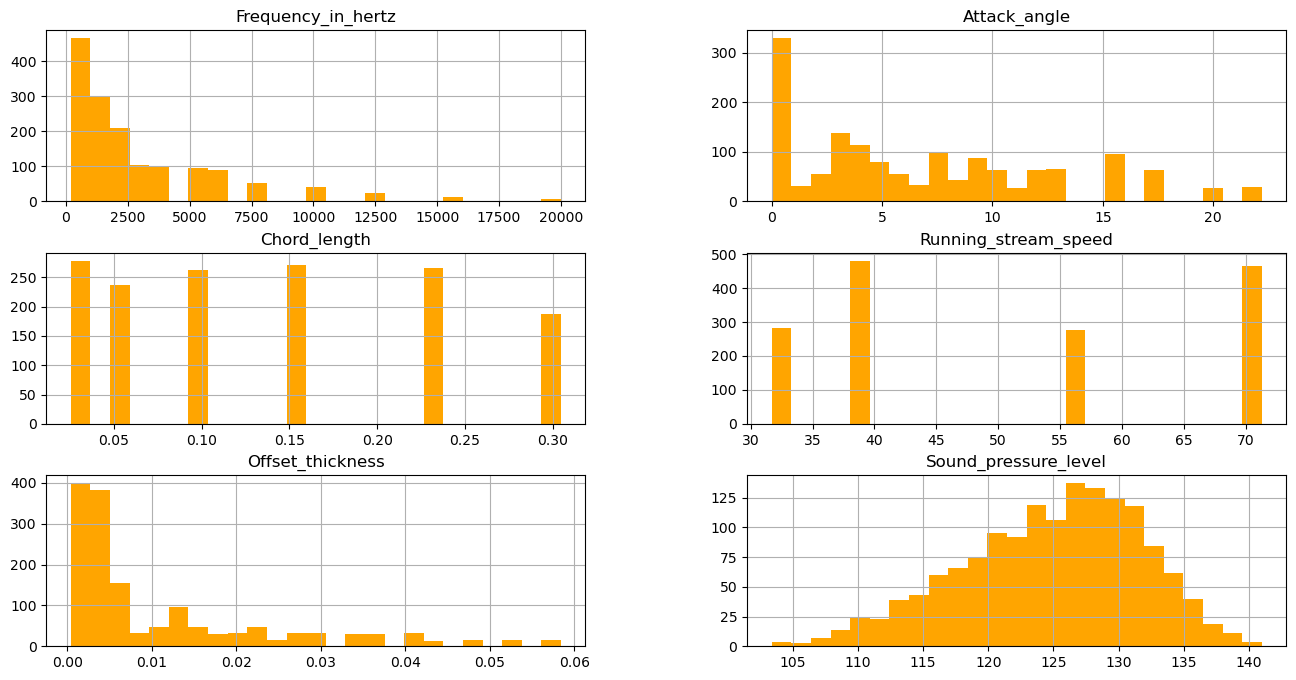

In [10]:
df.hist(bins=25,figsize=(16,8),color='orange')

Частота, угол атаки и толщина смещения имеют геометрическое распределение, длина хорды и скорость потока-равномерное, значения уровня звукового давления распределены по закону, близкому к нормальному.

Рассмотрим влияние признаков на целевое значение.

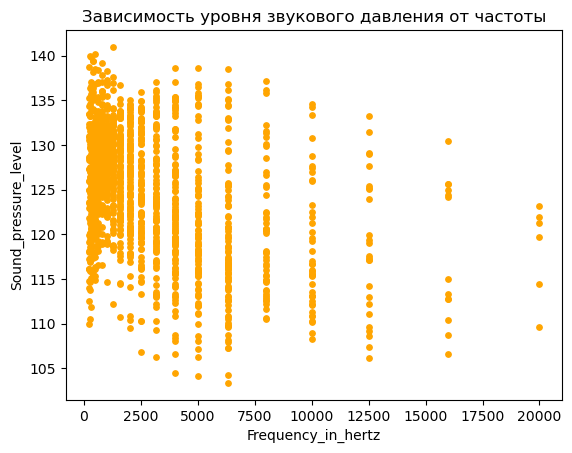

In [11]:
plt.scatter(df.Frequency_in_hertz, df.Sound_pressure_level, s=15, c='orange')
plt.xlabel("Frequency_in_hertz")
plt.ylabel("Sound_pressure_level")
plt.title("Зависимость уровня звукового давления от частоты")
plt.show()

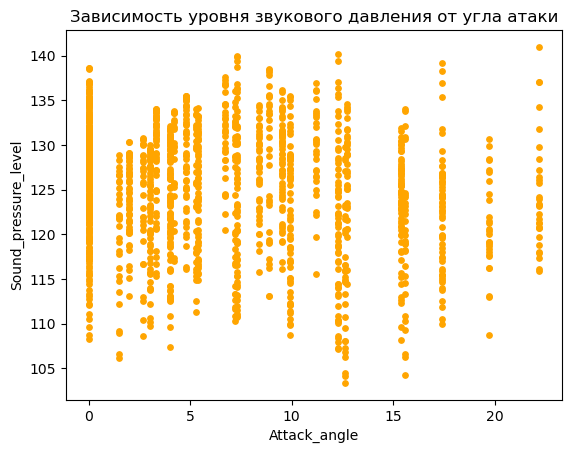

In [12]:
plt.scatter(df.Attack_angle, df.Sound_pressure_level, s=15, c='orange')
plt.xlabel("Attack_angle")
plt.ylabel("Sound_pressure_level")
plt.title("Зависимость уровня звукового давления от угла атаки")
plt.show()

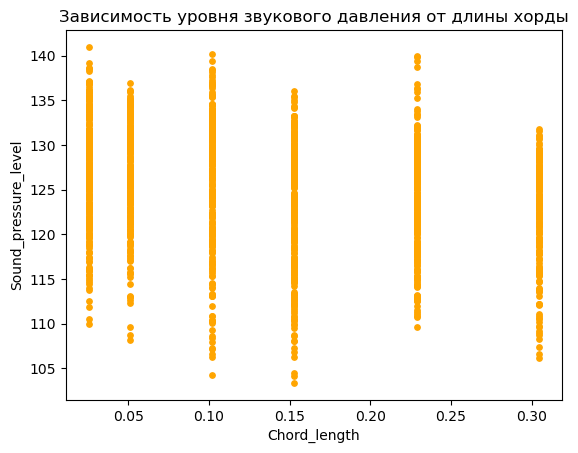

In [13]:
plt.scatter(df.Chord_length, df.Sound_pressure_level,s=15, c='orange')
plt.xlabel("Chord_length")
plt.ylabel("Sound_pressure_level")
plt.title("Зависимость уровня звукового давления от длины хорды")
plt.show()

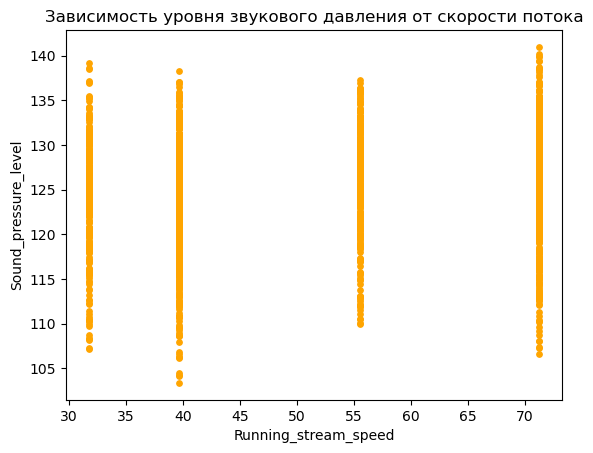

In [14]:
plt.scatter(df.Running_stream_speed, df.Sound_pressure_level,s=15, c='orange')
plt.xlabel("Running_stream_speed")
plt.ylabel("Sound_pressure_level")
plt.title("Зависимость уровня звукового давления от скорости потока")
plt.show()

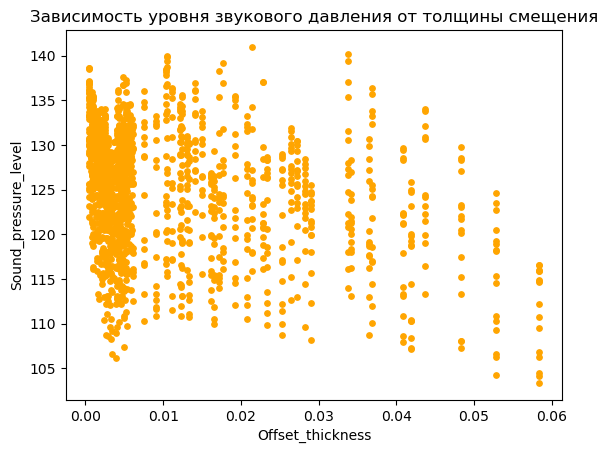

In [15]:
plt.scatter(df.Offset_thickness, df.Sound_pressure_level,s=15, c='orange')
plt.xlabel("Offset_thickness")
plt.ylabel("Sound_pressure_level")
plt.title("Зависимость уровня звукового давления от толщины смещения")
plt.show()

Анализ графиков показывает, что при меньших значениях частоты и толщины смещения наиболее вероятно получить близкий к среднему уровень давления. Влияние остальных признаков трудно определить, исследуем его с помощью матрицы корреляции.

In [16]:
corr_matryx=df.corr()
corr_matryx.style.background_gradient(cmap='coolwarm', axis=None)

,Frequency_in_hertz,Attack_angle,Chord_length,Running_stream_speed,Offset_thickness,Sound_pressure_level
Frequency_in_hertz,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Attack_angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Running_stream_speed,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Offset_thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Sound_pressure_level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


Так, на значения целевой переменной действительно оказывают наибольшее влияние частота и толщина смещения, но связь около 0,3 может быть оценена как слабая. Высокой теснотой обладает связь признаков угла атаки и толщины смещения, средней - угла атаки и длины хорды, что свидетельствует об их мультиколлинеарности и может вести к дальнейшему переобучению модели. В таком случае целесообразно удалить один из факторов (тот, который наиболее связан с другими переменными) или минимизировать воздействие с помощью регуляризации.

In [17]:
df1 = df.copy(deep=True)
df_clean1 = df1[['Frequency_in_hertz', 'Chord_length','Running_stream_speed','Offset_thickness','Sound_pressure_level']]
df_clean1.describe()

,Frequency_in_hertz,Chord_length,Running_stream_speed,Offset_thickness,Sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,0.136548,50.860745,0.011140,124.835943
std,3152.573137,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,0.304800,71.300000,0.058411,140.987000


Анализ данных также позволил выявить наличие выбросов значений некоторых признаков. Проверим гипотезу с помощью боксплотов.

<Axes: >

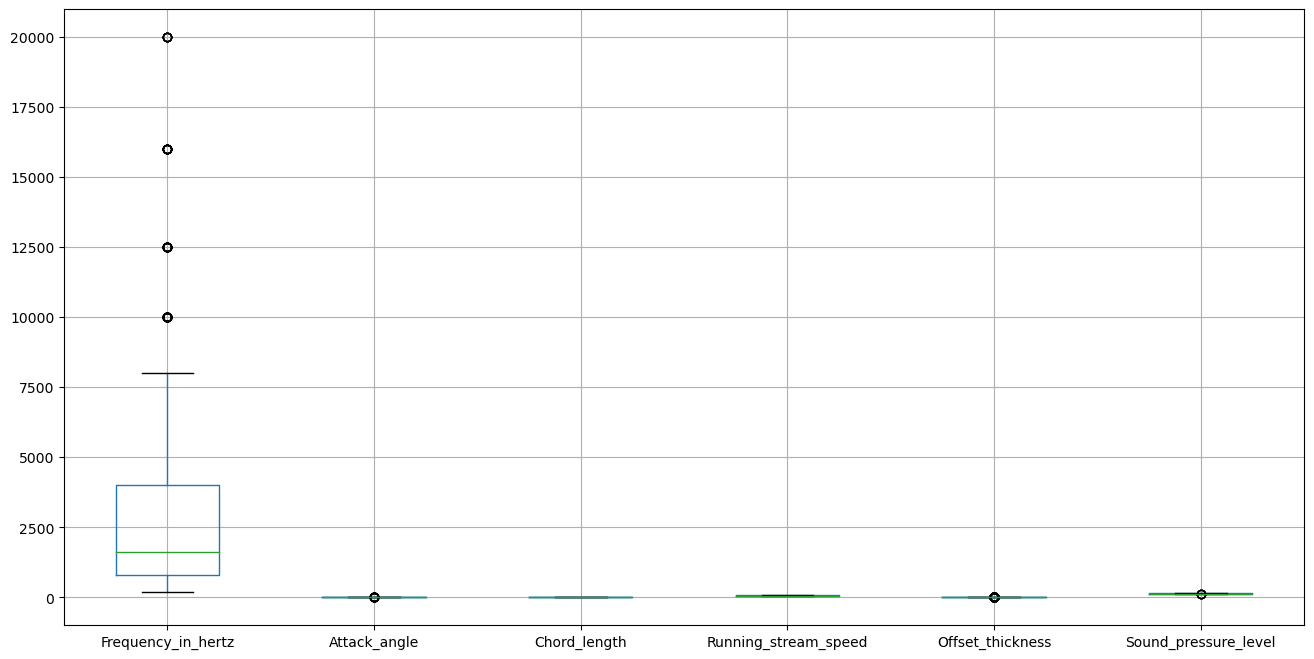

In [18]:
df.boxplot(figsize=(16,8))

При изменении масштабов построения графика выявлено наличие выбросов по верхней границе для частоты, угла атаки и толщины смещения, для уровня давления-по нижней границе. Выбросы могут оказать негативное влияние на точность модели. Очистка от выбросов может быть произведена межквартильного диапазона (метод трех сигм не применялся, так как распределение большинства переменных не является нормальным) следующим образом:

In [56]:
Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR=Q3-Q1
df2 = df.copy(deep=True)
df_clean2 = df2[~((df2 < (Q1-1.5*IQR)) | (df2 > (Q3+1.5*IQR))).any(axis=1)]
df_clean2.describe()

,Frequency_in_hertz,Attack_angle,Chord_length,Running_stream_speed,Offset_thickness
count,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000
mean,2375.399842,6.038480,0.141922,50.520190,0.008148
std,2090.999167,5.259982,0.095703,15.584664,0.008365
min,200.000000,0.000000,0.025400,31.700000,0.000401
25%,800.000000,2.000000,0.050800,39.600000,0.002535
50%,1600.000000,4.800000,0.152400,39.600000,0.004614
75%,3150.000000,9.500000,0.228600,71.300000,0.012181
max,8000.000000,19.700000,0.304800,71.300000,0.034118


Таким образом, данные подготовлены к построению модели. Для построения оптимальной регрессии предлагается сравнить ее качество на исходных и очищенных данных.

Выделим целевую переменную в отдельный столбец, сформируем тренировочную и тестовую выборки по исходным данным:

In [20]:
y = df.pop('Sound_pressure_level')
X = df

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Также подготовим альтернативные (очищенные) данные, чтобы обучить на них модель и проверить гипотезу о том, что качество исходных данных не позволит построить модель с высоким значением метрик.

Подготовка выборок для данных без столбца "угол атаки" для устранения мультиколлинеарности:

In [22]:
y1 = df_clean1.pop('Sound_pressure_level')
X1 = df_clean1

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2)

Тренировочная и тестовая выборки данных без выбросов:

In [24]:
y2 = df_clean2.pop('Sound_pressure_level')
X2 = df_clean2

In [25]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2)

# Подбор модели регрессии

## 1. Линейная регрессия

Модель для исходного датафрейма:

In [26]:
LR = LinearRegression()
LR.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(LR.score(X_train, y_train),LR.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(LR, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.51506, for test set: 0.51507.
Cross-validation score: 0.40983.


Параметры этой модели:

In [27]:
print('коэффициенты регрессии:', ['{:.3f}'.format(c) for c in LR.coef_])
print('свободная переменая: {:.3f}.'.format(LR.intercept_))

коэффициенты регрессии: ['-0.001', '-0.442', '-35.751', '0.095', '-149.482']
свободная переменая: 133.324.


Видим, что модель предсказывает около половины значений целевой переменной, что является низким результатом. Проверим,  как она будет работать на очищенных данных.

Датафрейм без столбца "угол атаки":

In [28]:
LR1 = LinearRegression()
LR1.fit(X_train1, y_train1)
print('R2-score for train set 1: {:.5f}, for test set 1: {:.5f}.'.format(LR1.score(X_train1, y_train1),LR1.score(X_test1, y_test1)))
mean_CVS=np.mean(cross_val_score(LR1, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set 1: 0.47969, for test set 1: 0.46297.
Cross-validation score: 0.40983.


Датафрейм без выбросов:

In [29]:
LR2 = LinearRegression()
LR2.fit(X_train2, y_train2)
print('R2-score for train set 2: {:.5f}, for test set 2: {:.5f}.'.format(LR2.score(X_train2, y_train2),LR2.score(X_test2, y_test2)))
mean_CVS=np.mean(cross_val_score(LR2, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set 2: 0.45692, for test set 2: 0.45565.
Cross-validation score: 0.40983.


Обучение линейной модели на очищенных данных не обеспечивает прирост качества, также возникают сомнения в достоверности такой модели, метод требует уточнений у заказчика модели.
Потому в ходе дальнейшего усовершенствования модели будем работать только с исходными данными.

## 2. Линейная регрессия+масштабирование

Применим минимаксную масштабацию к линейной модели:

In [30]:
LR_mm = Pipeline([('scaler', MinMaxScaler()),
               ('regression', LinearRegression())])
LR_mm.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(LR_mm.score(X_train, y_train),LR_mm.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(LR_mm, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.51506, for test set: 0.51507.
Cross-validation score: 0.40983.


Стандартное масштабирование:

In [31]:
LR_st = Pipeline([('scaler', StandardScaler()),
                  ('regression', LinearRegression())])
LR_st .fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(LR_st.score(X_train, y_train),LR_st.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(LR_st, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.51506, for test set: 0.51507.
Cross-validation score: 0.40983.


Масштабирование не улучшает качество модели, следовательно, линейная модель регрессии в обычном виде не подходит. Попробуем применить регуляризацию.

## 3. Регрессия с регуляризацией+масштабирование

Модель, основанная на минимаксном масштабировании и Лассо-регрессии (гиперпараметр подбирался вручную для максимизации значения на тестовой выборке):

In [60]:
L1_mm = Pipeline([('scaler', MinMaxScaler()),
                  ('regression', Lasso(alpha = 0.03))])
L1_mm.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(L1_mm.score(X_train, y_train),L1_mm.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(L1_mm, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.51242, for test set: 0.51820.
Cross-validation score: 0.40675.


Модель, основанная на стандартном масштабировании и Лассо-регрессии (гиперпараметр подбирался вручную для максимизации значения на тестовой выборке):

In [75]:
L1_st = Pipeline([('scaler', StandardScaler()),
                  ('regression', Lasso(alpha = 0.08))])
L1_st.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(L1_st.score(X_train, y_train),L1_st.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(L1_st, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.51385, for test set: 0.51656.
Cross-validation score: 0.40777.


Модель, основанная на минимаксном масштабировании и Ридж-регрессии (гиперпараметр подбирался вручную для максимизации значения на тестовой выборке):

In [92]:
L2_mm = Pipeline([('scaler', MinMaxScaler()),
                  ('regression', Ridge(alpha = 3))])
L2_mm.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(L2_mm.score(X_train, y_train),L2_mm.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(L2_mm, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.51073, for test set: 0.51950.
Cross-validation score: 0.41904.


Модель, основанная на стандартном масштабировании и Ридж-регрессии (гиперпараметр подбирался вручную для максимизации значения на тестовой выборке):

In [99]:
L2_st = Pipeline([('scaler', StandardScaler()),
                  ('regression', Ridge(alpha =45))])
L2_st.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(L2_st.score(X_train, y_train),L2_st.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(L2_st, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.51302, for test set: 0.51739.
Cross-validation score: 0.41312.


Таким образом, для настраиваемой модели лучше подходит минимаксное масштабирование. Ридж-регрессия оптимальна, если ее недообучать, Лассо, напротив, требует альфа менее 1. Однако качество модели по-прежнему остается низким, потому следует применить полиномиальную регрессию.

## 4. Полиномиальная регрессия, конвейеры

### 4.1. Линейная 

Для начала построим полином, основанный на линейной регрессии и минимаксном масштабировании, которое будем применять во всех дальнейших моделях. Подбор степени полинома осуществим с помощью цикла:

In [104]:
for i in range(1, 11):
    PR_mm = Pipeline([('poly', PolynomialFeatures(degree = i)),
                   ('scaler', MinMaxScaler()),
                   ('regression', LinearRegression())])
    PR_mm.fit(X_train, y_train)
    print('Degree=',i,'- R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_mm.score(X_train, y_train),PR_mm.score(X_test, y_test)))

Degree= 1 - R2-score for train set: 0.51506, for test set: 0.51507.
Degree= 2 - R2-score for train set: 0.64081, for test set: 0.65614.
Degree= 3 - R2-score for train set: 0.74659, for test set: 0.74848.
Degree= 4 - R2-score for train set: 0.76475, for test set: 0.63286.
Degree= 5 - R2-score for train set: 0.90516, for test set: 0.81601.
Degree= 6 - R2-score for train set: 0.93193, for test set: 0.46166.
Degree= 7 - R2-score for train set: 0.95994, for test set: 0.50192.
Degree= 8 - R2-score for train set: 0.97594, for test set: -1314.89004.
Degree= 9 - R2-score for train set: 0.98320, for test set: -119412.26730.
Degree= 10 - R2-score for train set: 0.98866, for test set: -48330126.78200.


Наилучшие результаты на тестовой выборке получены при 5 степени полинома. Модель такого вида будет иметь вид:

In [105]:
PR_mm = Pipeline([('poly', PolynomialFeatures(degree = 5)),
               ('scaler', MinMaxScaler()),
               ('regression', LinearRegression())])
PR_mm.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_mm.score(X_train, y_train),PR_mm.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(PR_mm, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.90516, for test set: 0.81601.
Cross-validation score: -279586335672542670356480.00000.


Произошло увеличение качества модели по оценке R2 на треть, но оно сопровождалось значительным ухудшением значения при валидации. При таком отрицательном коэффициенте детерминации применение модели не несет практического смысла. Построим график зависимости качества модели от степени.

<Figure size 1600x800 with 0 Axes>

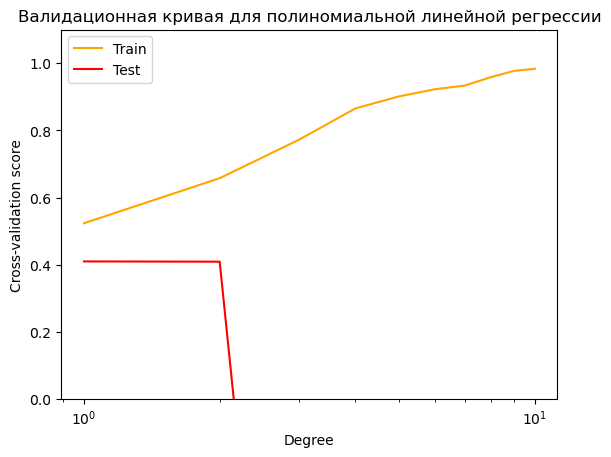

<Figure size 1600x800 with 0 Axes>

In [106]:
p_range=range(1,11)
train_sc, test_sc=validation_curve(PR_mm, X, y,param_name="poly__degree", param_range=p_range, cv=5)
train_sc_mean=np.mean(train_sc, axis=1)
test_sc_mean=np.mean(test_sc, axis=1)
plt.ylim(0.0,1.1)
plt.semilogx(p_range, train_sc_mean,label='Train', color='orange')
plt.semilogx(p_range, test_sc_mean,label='Test',color='red')
plt.xlabel("Degree")
plt.ylabel("Cross-validation score")
plt.title("Валидационная кривая для полиномиальной линейной регрессии")
plt.legend()
plt.figure(figsize=(16,8))

Согласно этому методу, оптимален будет полином 2 степени:

In [107]:
PR_mm = Pipeline([('poly', PolynomialFeatures(degree = 2)),
               ('scaler', MinMaxScaler()),
               ('regression', LinearRegression())])
PR_mm.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_mm.score(X_train, y_train),PR_mm.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(PR_mm, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.64081, for test set: 0.65614.
Cross-validation score: 0.40903.


### 2. Лассо-регуляризация

Модель полинома с Лассо-регуляризацией будет иметь вид:

In [143]:
PR_L1_mm = Pipeline([('poly', PolynomialFeatures(degree = 4)),
                  ('scaler', MinMaxScaler()),
                  ('regression', Lasso(alpha = 0.01,max_iter = 2000))])
PR_L1_mm.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_L1_mm.score(X_train, y_train),PR_L1_mm.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(PR_L1_mm, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.69641, for test set: 0.72093.
Cross-validation score: 0.57401.


Первоначальный подбор оптимальных гиперпараметров был осуществлен с помощью поиска по сетке: 

In [142]:
params={'poly__degree':range(1,11),
        'regression__alpha':[10, 5, 1, 0,5, 0.1, 0.05, 0.01, 0.005, 0.001]}
grid=GridSearchCV(PR_L1_mm,params,cv=5)
grid.fit(X,y)
grid.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+04, tolerance: 6.056e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.405e+03, tolerance: 6.056e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.449e+03, tolerance: 5.454e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinat

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.726e+03, tolerance: 5.421e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.089e+01, tolerance: 5.773e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.915e+02, tolerance: 6.056e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.945e+02, tolerance: 5.837e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+03, toleranc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+03, tolerance: 5.837e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.168e+03, tolerance: 5.454e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e+02, toleranc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.774e+02, tolerance: 5.773e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.728e+02, tolerance: 5.421e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.705e+02, tolerance: 5.421e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the num

{'poly__degree': 4, 'regression__alpha': 0.01}

Так как в список потенциальных альфа для ускорения обработки были переданы дискретные величины, для улучшения модели были проверены близкие к ним значения на предмет улучшения качества. При незначительном ухудшении метрики на валидации возможно получить лучшее значение R2 на тестовой выборке:

In [147]:
PR_L1_mm1 = Pipeline([('poly', PolynomialFeatures(degree = 5)),
                  ('scaler', MinMaxScaler()),
                  ('regression', Lasso(alpha = 0.01,max_iter = 2000))])
PR_L1_mm1.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_L1_mm1.score(X_train, y_train),PR_L1_mm1.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(PR_L1_mm1, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.70182, for test set: 0.72476.
Cross-validation score: 0.53845.


Также вручную была проверена существующая модель при применении стандартного масштабирования, существенных улучшений не выявлено.

In [193]:
PR_L1_st = Pipeline([('poly', PolynomialFeatures(degree = 4)),
                  ('scaler', StandardScaler()),
                  ('regression', Lasso(alpha = 0.07,max_iter = 2000))])
PR_L1_st.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_L1_st.score(X_train, y_train),PR_L1_st.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(PR_L1_st, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.70487, for test set: 0.72615.
Cross-validation score: 0.56146.


Таким образом, пока оптимальной является модель PR_L1_mm с подобранными по сетке параметрами.

### 3. Ридж-регуляризация

Аналогично модель полинома с Ридж-регуляризацией будет иметь вид:

In [149]:
PR_L2_mm = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                  ('scaler',  MinMaxScaler()),
                  ('regression', Ridge(alpha = 5, max_iter = 2000))])
PR_L2_mm.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_L2_mm.score(X_train, y_train),PR_L2_mm.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(PR_L2_mm, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.64846, for test set: 0.67993.
Cross-validation score: 0.56253.


Подбор оптимальных гиперпараметров также был осуществлен с помощью поиска по сетке:

In [148]:
params={'poly__degree':range(1,11),
        'regression__alpha':[50, 10, 5, 1, 0,5, 0.1, 0.05, 0.01, 0.005, 0.001]}
grid=GridSearchCV(PR_L2_mm,params,cv=5)
grid.fit(X,y)
grid.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_mo

{'poly__degree': 3, 'regression__alpha': 5}

Так как в список потенциальных альфа для ускорения обработки были переданы дискретные величины, для улучшения модели были проверены близкие к ним значения на предмет улучшения качества R2 на тестовой выборке.При незначительном ухудшении метрики на валидации возможно получить лучшее значение R2 на тестовой выборке:

In [168]:
PR_L2_mm1 = Pipeline([('poly', PolynomialFeatures(degree = 4)),
                  ('scaler', MinMaxScaler()),
                  ('regression', Ridge(alpha =1, max_iter = 2000))])
PR_L2_mm1.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_L2_mm1.score(X_train, y_train),PR_L2_mm1.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(PR_L2_mm1, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.71203, for test set: 0.72230.
Cross-validation score: 0.52208.


Также вручную была проверена существующая модель при применении стандартного масштабирования, существенных улучшений не выявлено.

In [175]:
PR_L2_st = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                  ('scaler', StandardScaler()),
                  ('regression', Ridge(alpha =15, max_iter = 2000))])
PR_L2_st.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_L2_st.score(X_train, y_train),PR_L2_st.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(PR_L2_st, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.70460, for test set: 0.72175.
Cross-validation score: 0.54123.


Таким образом, работа с Ридж-регуляризацией для полинома показала несколько худший результат, чем Лассо.

# Заключение

В контрольной работе решалась задача регрессии для уровня звукового давления в аэродинамической трубе в зависимости от частоты, угла атаки, длины хорды, скорости потока и толщины смещения.

Исходный набор даннных без значительных преобразований непригоден для построения регрессионных моделей с высокой степенью качества ввиду наличия выбросов и избыточных связей между переменными.

Применение полиномиальной регрессии и ее совмещение с регуляризацией позволили добиться метрик качества модели регрессии для тестового сета около 72%, на валидации приблизиться к 57%. Дальнейшее изменение параметров приводит к уменьшению одной из оценок.

Среди подобранных моделей оптимальным является полином 4 степени с Лассо-регуляризацией, обученный на масштабированных минимаксным способом данных (модель под названием PR_L1_mm).

In [194]:
PR_L1_mm = Pipeline([('poly', PolynomialFeatures(degree = 4)),
                  ('scaler', MinMaxScaler()),
                  ('regression', Lasso(alpha = 0.01,max_iter = 2000))])
PR_L1_mm.fit(X_train, y_train)
print('R2-score for train set: {:.5f}, for test set: {:.5f}.'.format(PR_L1_mm.score(X_train, y_train),PR_L1_mm.score(X_test, y_test)))
mean_CVS=np.mean(cross_val_score(PR_L1_mm, X, y, cv = 5))
print('Cross-validation score: {:.5f}.'.format(mean_CVS))

R2-score for train set: 0.69641, for test set: 0.72093.
Cross-validation score: 0.57401.


Точность ее прогноза для всего набора данных отражена на графике:

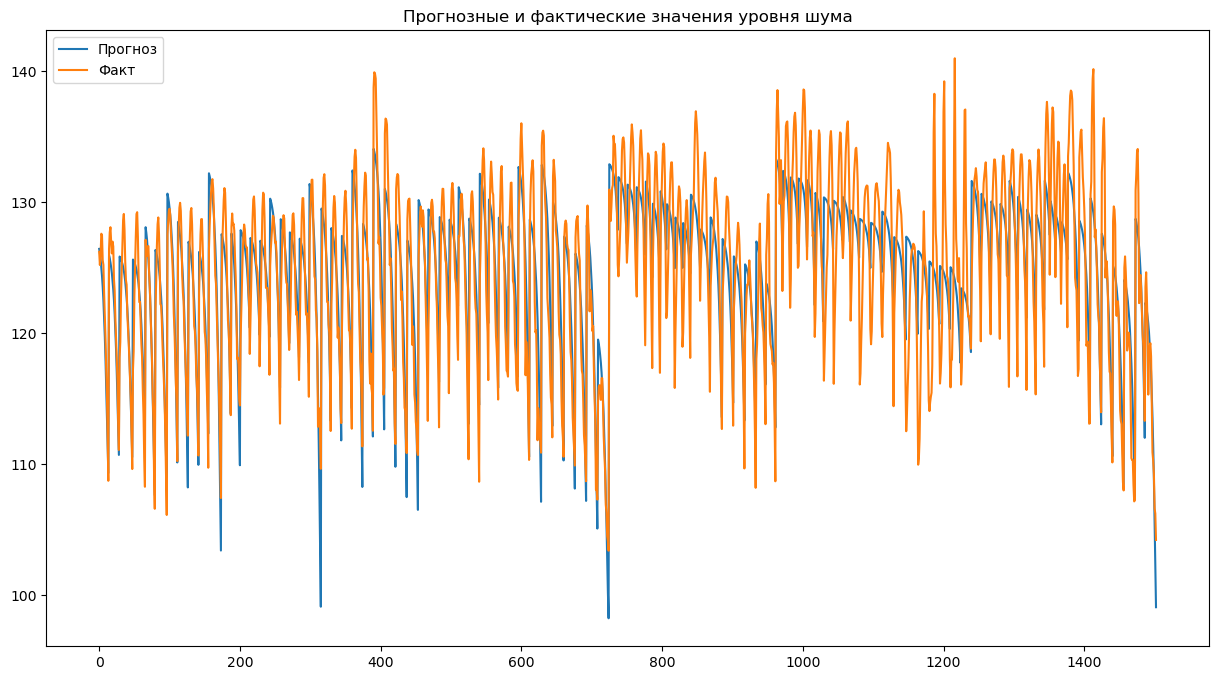

In [199]:
Y_pr=PR_L1_mm.predict(X)
plt.figure(figsize=(15, 8))
plt.plot(Y_pr, label = "Прогноз")
plt.plot(y, label = "Факт")
plt.title('Прогнозные и фактические значения уровня шума')
plt.legend()
plt.show()

Таким образом, поставленная задача решена со значеним R2 около 0,72. Улучшение метрики требует модификации данных или применения более сложных моделей. 